In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy as sc
import dynfc as dyn
from random import sample, seed
import seaborn as sns

In [2]:
folder_path= "C:/Users/Soft/OneDrive - Northumbria University - Production Azure AD/Desktop/Dissertation/BOLD/"
mat = scipy.io.loadmat(folder_path + '2020_07_connectomes90_AllFC.mat')

C:\Users\Soft\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [4]:
# create dataframe for treatment group

# create dataframe of ID for all samples
id_list=[mat['sub'][0][i][0].replace('sub-','') for i in range(mat['sub'][0].shape[0])]
sub= pd.DataFrame(id_list, columns=['id'])

# create (subset) dataframe of ID for samples clustering is done on
# duplicate entries suggest multiple scans for certain babies
clus_label= pd.read_csv('C:/Users/Soft/script_aqil/clus_label.csv')
clus_label.id= clus_label.id.str.split('_', expand= True)[0]
sub_treat= sub[sub.id.isin(list(clus_label.id))]
# add cluster number for each subject, preserving index from mat
clus_label.set_index('id', inplace= True)
sub_treat= sub_treat.join(clus_label, on= 'id')

# keep only latest scans of samples with multiple scans
sub_treat.drop_duplicates(keep='last', inplace= True)

In [6]:
# create dataframe for control group

# read file with details about each sample and scan
combined= pd.read_csv('C:/Users/Soft/script_aqil/combined.tsv', sep='\t')
# create dataframe for control group, babies undergone no treatment
control= combined[combined.birth_age>39]
control_omit_list= list(control[control.scan_number>1].index)
control= control.loc[~control.index.isin(control_omit_list)]

# sample control group from term born babies, match with ID to mat data to find index, use that index to extract their metastability
id_control= list(control.participant_id)
seed(13)
id_control= sample(id_control, 50)
sub_control= sub[sub.id.isin(id_control)]
sub_control= sub_control.join(control.set_index('participant_id'), on='id')
sub_control['ga_weeks'], sub_control['ga_days']= np.round(sub_control.birth_age,2), np.round(sub_control.birth_age*7)
sub_control['cluster']= sub_control['cluster_total_pain']= 0
sub_control= sub_control.rename(columns={'participant_id':'id'})[['id', 'cluster', 'ga_days', 'ga_weeks', 'cluster_total_pain']]
# even though 20 sampled, result has 17 (possibly due to some of them from 'combined' missing in 'mat')

In [7]:
# calcluate metrics
RSsig = mat['meanBOLDAll']
metastab, sync, shEntropy = dyn.run_multiPatKOP(RSsig, 2, 8, 0.392, .02, .1, 2)

Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 1.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 2.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 3.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 4.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 5.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 6.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 7.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 8.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 9.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 10.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 11.
Signal filtered.
Ph

Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 93.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 94.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 95.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 96.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 97.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 98.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 99.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 100.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 101.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 102.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 103.
Signal

Matrices obtained.
Routine finished for patient no. 183.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 184.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 185.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 186.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 187.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 188.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 189.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 190.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 191.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 192.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 193.
Signal filtered.
Phases obtained.

Phases obtained.
Matrices obtained.
Routine finished for patient no. 275.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 276.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 277.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 278.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 279.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 280.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 281.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 282.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 283.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 284.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 285.
Signal filtered.

Matrices obtained.
Routine finished for patient no. 367.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 368.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 369.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 370.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 371.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 372.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 373.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 374.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 375.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 376.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 377.
Signal filtered.
Phases obtained.

Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 458.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 459.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 460.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 461.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 462.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 463.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 464.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 465.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 466.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 467.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 468.

Phases obtained.
Matrices obtained.
Routine finished for patient no. 549.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 550.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 551.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 552.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 553.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 554.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 555.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 556.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 557.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 558.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 559.
Signal filtered.

Matrices obtained.
Routine finished for patient no. 640.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 641.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 642.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 643.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 644.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 645.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 646.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 647.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 648.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 649.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 650.
Signal filtered.
Phases obtained.

Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 731.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 732.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 733.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 734.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 735.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 736.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 737.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 738.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 739.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 740.
Signal filtered.
Phases obtained.
Matrices obtained.
Routine finished for patient no. 741.

In [8]:
# extract metastability for the subjects of interest
sub_treat['metastability']= metastab[list(sub_treat.index)]
sub_control['metastability']= metastab[list(sub_control.index)]

# combine control and treatment group into one dataframe
df= pd.concat([sub_treat, sub_control])

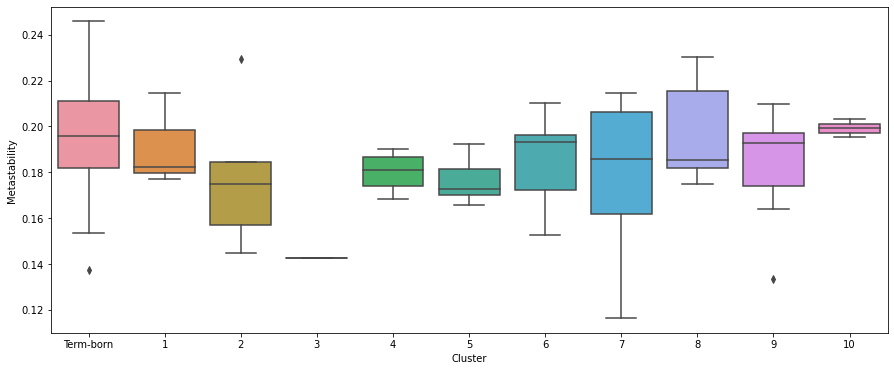

In [10]:
fig= plt.figure(figsize=(15,6))
sns.boxplot(x= 'cluster', y= 'metastability', data= df)
# xtik= ['Term-born']
# xtik.extend(range(1,11))
xtik= ['Term-born', '1', '2', '3', '4', '5', '6', '7' ,'8' ,'9' ,'10']
plt.xticks(range(len(xtik)), xtik)
plt.xlabel('Cluster',)
plt.ylabel('Metastability')
plt.show()

The values for the metastability is found to be in the expected range. But there is still no obvious pattern in the distribution of metastability among the different clusters. Higher values for metastability accompanied with higher variance can be observed in the control group.

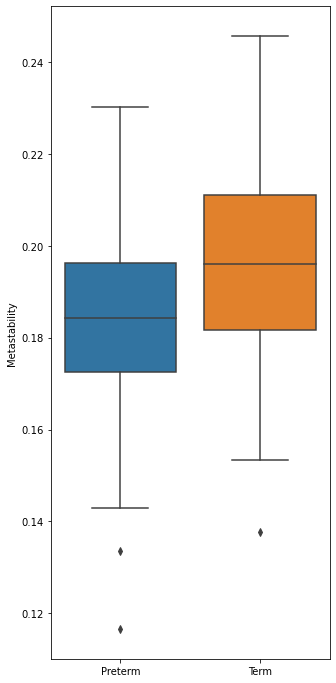

In [12]:
# compare metastability between Term babies and Preterm babies
df['Group']= np.where(df.cluster==0,'Term', 'Preterm')
fig= plt.figure(figsize=(5,12))
sns.boxplot(x= 'Group', y= 'metastability', data= df)
plt.ylabel('Metastability')
plt.xlabel('')
plt.show()

In [13]:
from scipy import stats
term= df[df.Group=='Term'].metastability
preterm= df[df.Group=='Preterm'].metastability
stats.ttest_ind(term, preterm)

Ttest_indResult(statistic=2.3587016596894044, pvalue=0.02036570669915087)

Comparison of distribution between Term babies and all the Preterm babies taken together shows a higher metastability for Term babies. t test shows significant difference of means at 5% level of significance.